In [ ]:
import random

In [ ]:
# introduction to Ml
#used libraries-random,Numpy,pandas

In [ ]:
#Terms in Machine learning
#1.collection:Data used for traning,validating and testing and testing the machine learning model
#2.Features(x):Independent variable or input variable used to predict the target variables
#3.Target(y):Department variable-output-we want to predict -Example :predicting Number of bedrooms
#4.Training Data:sunset of dataset used to train the model
#5.Testing Data:sunset of dataset used to validate the trained model
#6.model:mathematical representation of relationship between feature and target
#7.supervised learning (SL):Traning the data based on labeled data/model learns from known/labeled data.
#8.Regression: Method to predict  continuous values from a models supervised learning
#9.overfitting:when a model learn from Training data too well,includes noise-perform poorly new data.
#10.underfitting: Model is too simpler and does not capture patterns in data.


##Categories in Machine learning:
#1.Supervised learning:
# Model learns from labeled data-i/o pairs
# Example:Linear regression, Decision trees, Random forest,EVM
# Best use case so far:House price prediction based on previous/historical data

#2.Unsupervised learning:
# Model finds new patterns in unlabeled data without predefined data/labels.
# Example: Clustering(k means),PCA
# use case :customer segmentation in Marketing.


#3.Reinforcement learning:
#Model learns by interacting with environment and receiving the records or penalities
# Example:Deep learning, AlphaGo,..
# Best use case : Self car driving vehicles, Self learning AI bots,SLAM

In [11]:

#Example:predicting the house price - Random dataset - genarated

#Steps:
#1.Generate a random dataset
#2.Train a Ml model - linear regression
#3.Evaluate the model
#4.Make prediction

In [13]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
#step1:Generate a random dataset
np.random.seed(42)#used to set same sequence of values for the random package
numSamples=100
size=np.random.randint(800,5000,numSamples)
bedrooms =np.random.randint(1,6,numSamples)
washrooms=np.random.randint(1,8,numSamples)
localityScore=np.random.randint(1,10,numSamples)
#Generate house prices with randomness
houseprice = (size* 3000) + (bedrooms *50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)
#create a DataFrame
df=pd.DataFrame(
    {
      'Size':size,
      'Bedrooms':bedrooms,
      'Washrooms':washrooms,
      'LocalityScore':localityScore,
      'Price':houseprice
    }
)

In [25]:
df

,Size,Bedrooms,Washrooms,LocalityScore,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [30]:
#step2:Train a ML  model- linear regression
# package (installation)requirements:
#pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x=df[['Size','Bedrooms','Washrooms','LocalityScore']]
y=df['Price']

In [39]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [40]:

# Step 3 : Evaluate the model
# package Requirments :
# sklearn.metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(x_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE =np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squarred Error : {MSE}')
print(f'Root Mean squarred Error : {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squarred Error : 796791448.4323988
Root Mean squarred Error : 28227.494547557686


In [46]:
#Step4:Make a prediction
newHouse=np.array([[4000,4,6,10]])
Predictedprice=model.predict(newHouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
print(f'The predicted price of new house is {Predictedprice[0]}')

The predicted price of new house is 13069094.887436867


In [64]:
Predictedprice[0]

13069094.887436867

In [61]:
Xsorted=np.sort(X,axis=0)
Ypred=model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-65-b9b12939019a>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


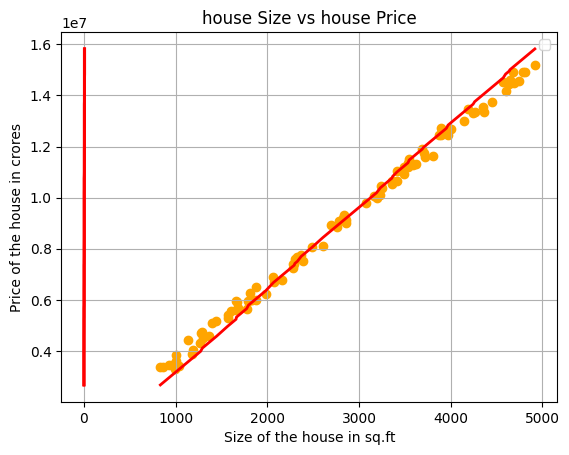

In [65]:

plt.scatter(df['Size'], df['Price'],color='orange')
plt.plot(Xsorted,Ypred,color='red',linewidth=2)
plt.xlabel ('Size of the house in sq.ft')
plt. ylabel ('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title ('house Size vs house Price')
plt. show()